## Asthma Disease Dataset 🌬️
### 
Comprehensive Health Data for Asthma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/asthma_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [3]:
df.drop(['PatientID','DoctorInCharge'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

In [4]:
df.duplicated().sum()

0

## Age: The age of the patients ranges from 5 to 80 years.
## Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
## Ethnicity: The ethnicity of the patients, coded as follo,0: Caucasian,1: African American,2:Asian,3:Other:
##  EducationLevel: The education level of the patients, coded as,0: None,1: High School,2: Bachelor's,3: Higherf
## BMI: Body Mass Index of the patients, ranging from 15 to 40.
## Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
## PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10
## DietQuality: Diet quality score, ranging from 0 to 10
## SleepQuality: Sleep quality score, ranging from 4 to 10
## PollutionExposure: Exposure to pollution, score from 0 to 10.
## PollenExposure: Exposure to pollen, score from 0 to 10.
## DustExposure: Exposure to dust, score from 0 to 10
## PetAllergy: Pet allergy status, where 0 indicates No and 1 indicates Yes
## FamilyHistoryAsthma: Family history of asthma, where 0 indicates No and 1 indicates Yes.
## HistoryOfAllergies: History of allergies, where 0 indicates No and 1 indicates Yes.
## Eczema: Presence of eczema, where 0 indicates No and 1 indicates Yes
## HayFever: Presence of hay fever, where 0 indicates No and 1 indicates Ye
## GastroesophagealReflux: Presence of gastroesophageal reflux, where 0 indicates No and 1 indicates Y
## LungFunctionFEV1: Forced Expiratory Volume in 1 second (FEV1), ranging from 1.0 to 4.0 liters.
## LungFunctionFVC: Forced Vital Capacity (FVC), ranging from 1.5 to 6.0 liters
## Wheezing: Presence of wheezing, where 0 indicates No and 1 indicates Yes.
## ShortnessOfBreath: Presence of shortness of breath, where 0 indicates No and 1 indicates Yes.
## ChestTightness: Presence of chest tightness, where 0 indicates No and 1 indicates Yes
## Coughing: Presence of coughing, where 0 indicates No and 1 indicates Yes
## NighttimeSymptoms: Presence of nighttime symptoms, where 0 indicates No and 1 indicates Yes
## ExerciseInduced: Presence of symptoms induced by exercise, where 0 indicates No and 1 indicate Yes
## Diagnosis: Diagnosis status for Asthma, where 0 indicates No and 1 indicates Yes.r

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['age', 'gender', 'ethnicity', 'educationlevel', 'bmi', 'smoking',
       'physicalactivity', 'dietquality', 'sleepquality', 'pollutionexposure',
       'pollenexposure', 'dustexposure', 'petallergy', 'familyhistoryasthma',
       'historyofallergies', 'eczema', 'hayfever', 'gastroesophagealreflux',
       'lungfunctionfev1', 'lungfunctionfvc', 'wheezing', 'shortnessofbreath',
       'chesttightness', 'coughing', 'nighttimesymptoms', 'exerciseinduced',
       'diagnosis'],
      dtype='object')

In [6]:
df.drop(['ethnicity','educationlevel'],axis=1,inplace=True)

In [7]:
df.describe()

,age,gender,bmi,smoking,physicalactivity,dietquality,sleepquality,pollutionexposure,pollenexposure,dustexposure,...,gastroesophagealreflux,lungfunctionfev1,lungfunctionfvc,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,42.137960,0.493311,27.244877,0.141722,5.051786,5.022867,7.019012,5.013030,5.114221,4.981864,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,21.606655,0.500060,7.201628,0.348838,2.903574,2.909980,1.732475,2.935605,2.893088,2.859192,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,0.001022,0.000659,0.002434,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,20.968313,0.000000,2.578333,2.432043,5.498500,2.432559,2.599996,2.467489,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.000000,27.052202,0.000000,5.016881,5.115383,6.975839,5.036519,5.098452,4.903278,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,61.000000,1.000000,33.555903,0.000000,7.540234,7.544216,8.526950,7.630037,7.708836,7.432218,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,79.000000,1.000000,39.985611,1.000000,9.995809,9.999904,9.996235,9.998964,9.999555,9.999708,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='age', ylabel='Count'>

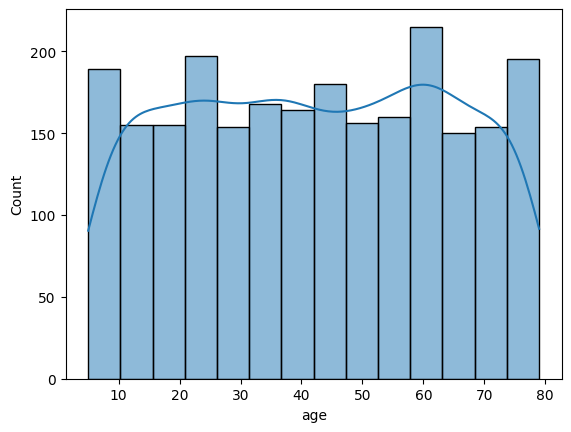

In [8]:
sns.histplot(x=df.age,kde=True)

<Axes: xlabel='gender', ylabel='count'>

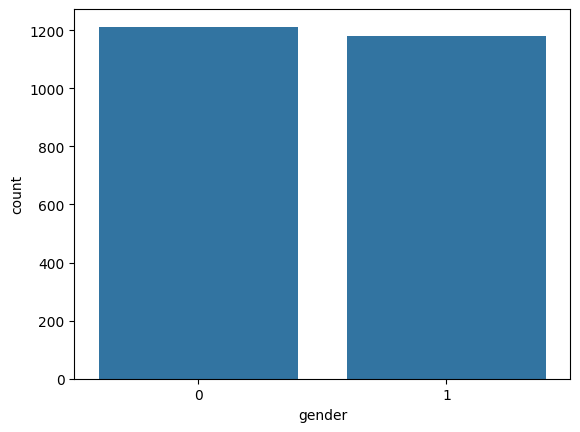

In [9]:
sns.countplot(x=df.gender)

In [10]:
df.columns

Index(['age', 'gender', 'bmi', 'smoking', 'physicalactivity', 'dietquality',
       'sleepquality', 'pollutionexposure', 'pollenexposure', 'dustexposure',
       'petallergy', 'familyhistoryasthma', 'historyofallergies', 'eczema',
       'hayfever', 'gastroesophagealreflux', 'lungfunctionfev1',
       'lungfunctionfvc', 'wheezing', 'shortnessofbreath', 'chesttightness',
       'coughing', 'nighttimesymptoms', 'exerciseinduced', 'diagnosis'],
      dtype='object')

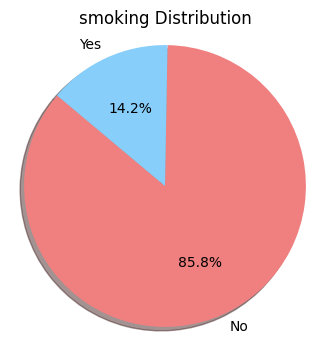

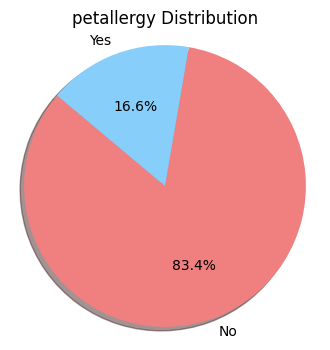

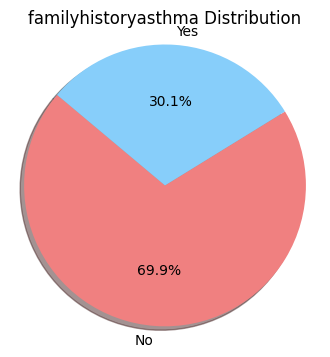

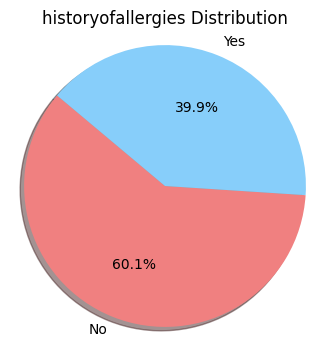

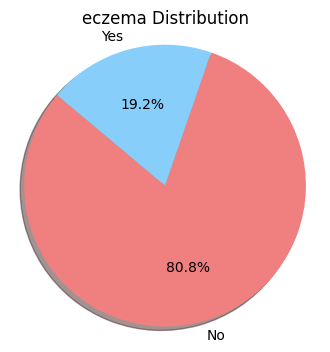

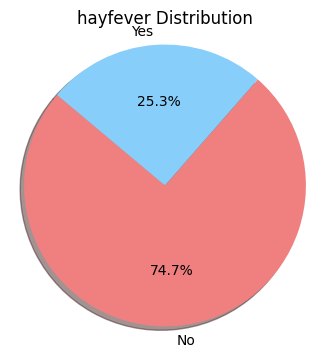

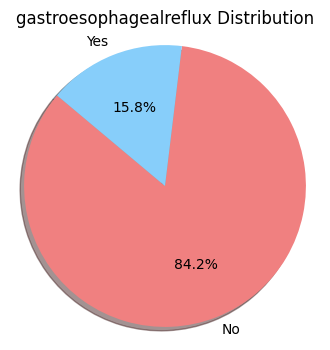

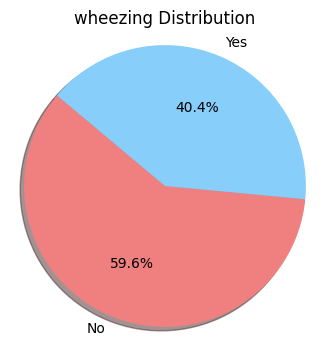

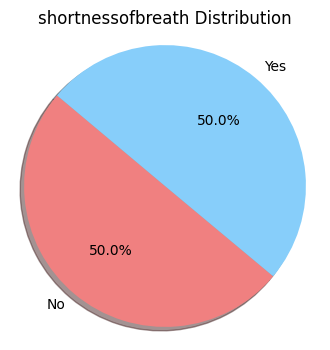

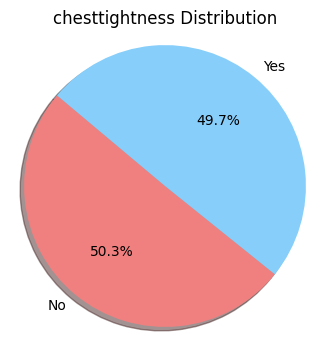

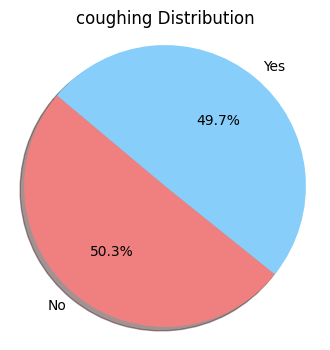

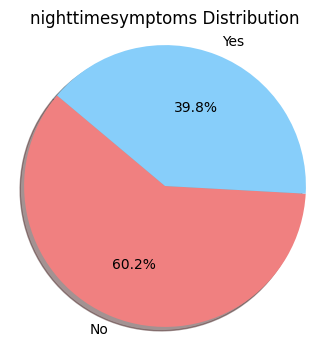

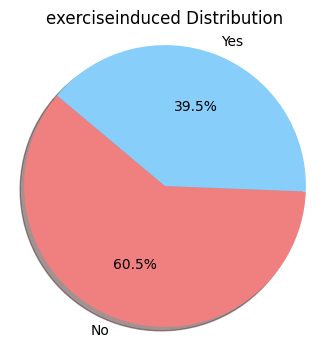

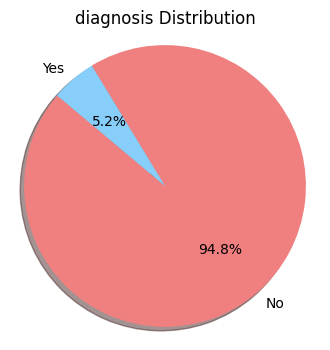

In [11]:
binary_cols = ['smoking','petallergy', 'familyhistoryasthma', 'historyofallergies', 'eczema','hayfever', 'gastroesophagealreflux', 'wheezing', 'shortnessofbreath', 'chesttightness','coughing', 'nighttimesymptoms', 'exerciseinduced', 'diagnosis']
for i in binary_cols:
    labels = ['No','Yes']
    sizes = df[i].value_counts()
    colors = ['lightcoral', 'lightskyblue']

    plt.figure(figsize=(4,4)) 
    plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')

    plt.title(f'{i} Distribution')
    plt.show()

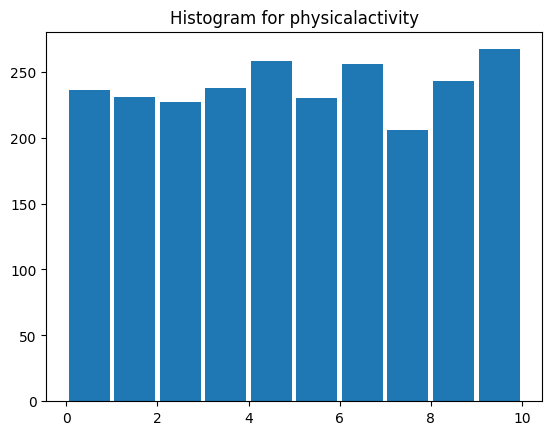

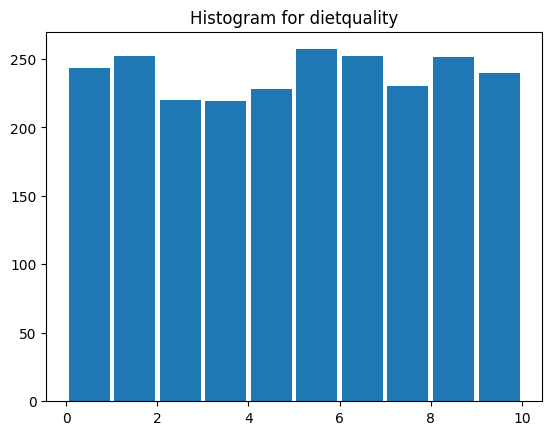

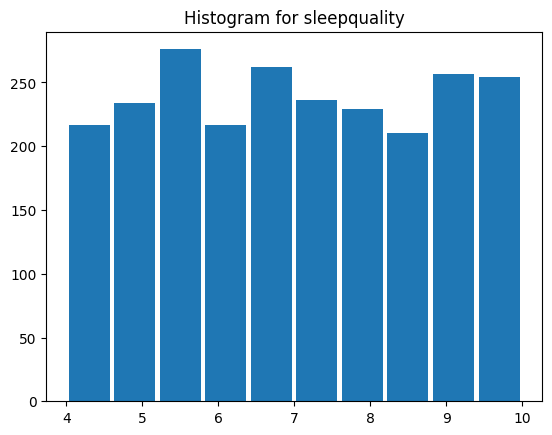

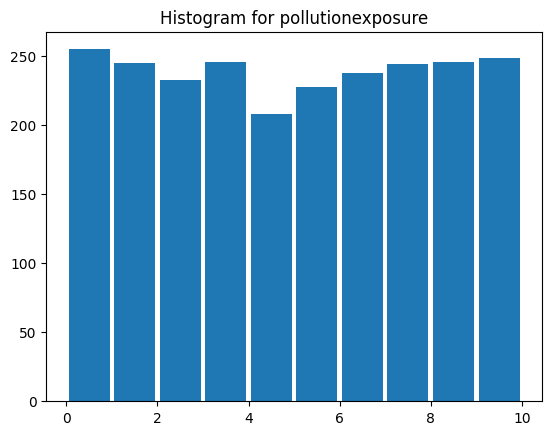

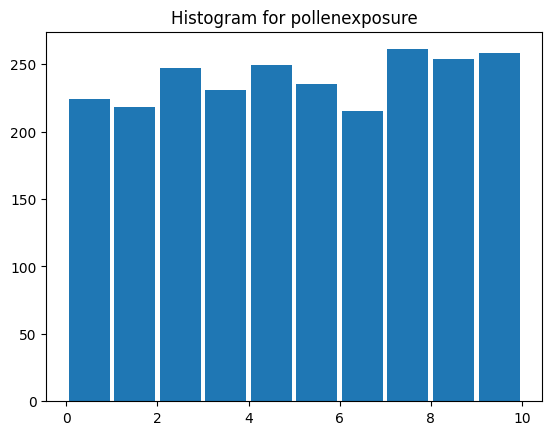

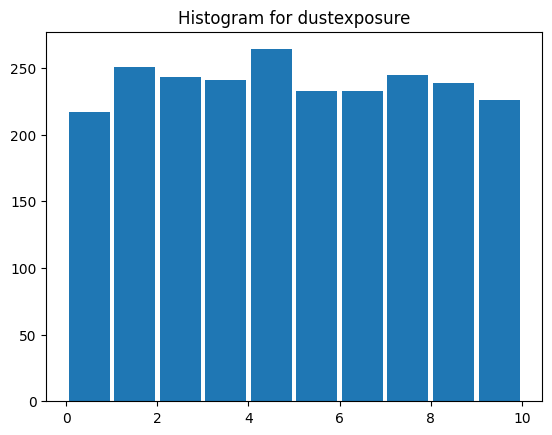

In [12]:
score_cols = ['physicalactivity', 'dietquality','sleepquality','pollutionexposure', 'pollenexposure','dustexposure']
for i in score_cols:
    plt.hist(df[i],rwidth=0.9)
    plt.title(f"Histogram for {i}")
    plt.show()

In [13]:
df.head()

,age,gender,bmi,smoking,physicalactivity,dietquality,sleepquality,pollutionexposure,pollenexposure,dustexposure,...,gastroesophagealreflux,lungfunctionfev1,lungfunctionfvc,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,diagnosis
0,63,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,...,0,3.470589,3.067944,1,1,1,0,0,1,0


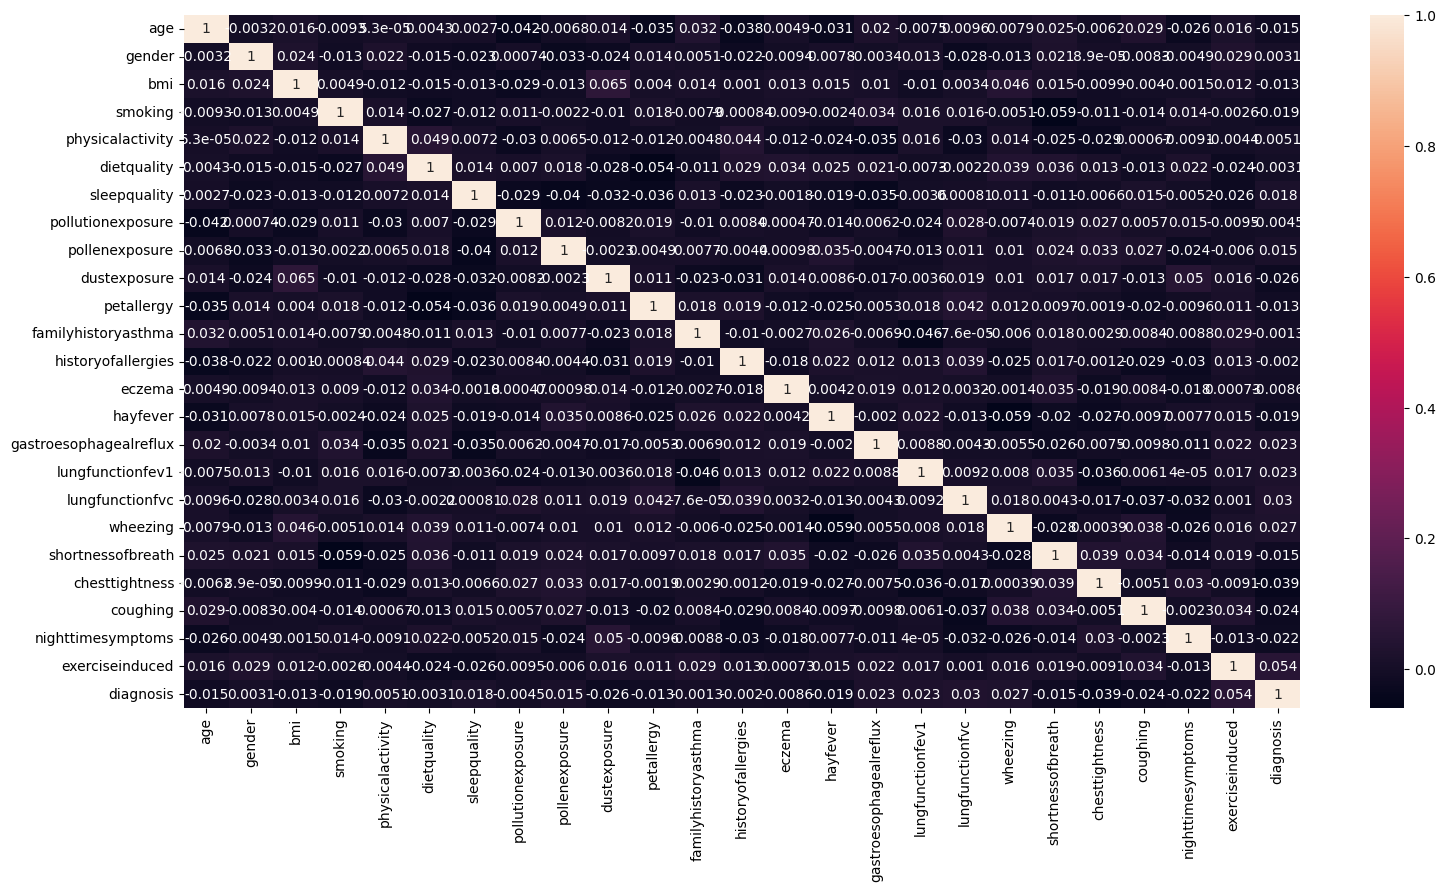

In [14]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
df.drop(['gender','physicalactivity','dietquality','pollutionexposure','familyhistoryasthma','historyofallergies','eczema'],axis=1,inplace=True)
df.head()

,age,bmi,smoking,sleepquality,pollenexposure,dustexposure,petallergy,hayfever,gastroesophagealreflux,lungfunctionfev1,lungfunctionfvc,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,diagnosis
0,63,15.848744,0,8.701003,2.855578,0.974339,1,0,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,22.757042,0,5.153966,7.457665,6.584631,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,18.395396,0,6.840647,1.448189,5.445799,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,38.515278,0,4.253036,7.571845,3.965316,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,19.283802,0,9.625799,3.049807,8.260605,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0


In [16]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X = df.drop('diagnosis',axis=1)
y = df.diagnosis
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [18]:
def correlate(df,threshold):
    col_corr = set()
    cor_matrix = df.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i,j]) > threshold:
                column = cor_matrix.columns[i]
                col_corr.add(column)
    return col_corr

In [19]:
features = correlate(X_train,0.03)

In [20]:
features

{'chesttightness',
 'coughing',
 'dustexposure',
 'exerciseinduced',
 'gastroesophagealreflux',
 'hayfever',
 'lungfunctionfev1',
 'lungfunctionfvc',
 'nighttimesymptoms',
 'petallergy',
 'pollenexposure',
 'shortnessofbreath',
 'sleepquality',
 'smoking',
 'wheezing'}

In [21]:
X_train.drop([i for i in X_train.columns if i not in features],axis=1,inplace=True)

In [22]:
X_train.columns

Index(['smoking', 'sleepquality', 'pollenexposure', 'dustexposure',
       'petallergy', 'hayfever', 'gastroesophagealreflux', 'lungfunctionfev1',
       'lungfunctionfvc', 'wheezing', 'shortnessofbreath', 'chesttightness',
       'coughing', 'nighttimesymptoms', 'exerciseinduced'],
      dtype='object')

In [23]:
X_test.drop([i for i in X_test.columns if i not in features],axis=1,inplace=True)

In [24]:
X_test.columns

Index(['smoking', 'sleepquality', 'pollenexposure', 'dustexposure',
       'petallergy', 'hayfever', 'gastroesophagealreflux', 'lungfunctionfev1',
       'lungfunctionfvc', 'wheezing', 'shortnessofbreath', 'chesttightness',
       'coughing', 'nighttimesymptoms', 'exerciseinduced'],
      dtype='object')

In [25]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(logging_level='Silent'),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

In [27]:
report = {}
print("Models' Report")
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Models' Report
{'Logistic Regression': 0.5970017636684304, 'SVC': 0.9038800705467372, 'KNeighbours': 0.9029982363315696, 'Cat Boost': 0.9938271604938271, 'XGB': 0.9902998236331569, 'Decision Tree': 0.9664902998236331, 'Random Forest': 1.0}
Random Forest is the best model with accuracy of 1.0


In [28]:
classifier = models[best_model_name]

In [29]:
import pickle
file_path = 'C:/Users/odhia/OneDrive/Desktop/mlopsProjects/elements/model.pkl'
obj = classifier
with open (file_path,'wb') as file_obj:
            pickle.dump(obj,file_obj)

In [30]:
file_path = 'C:/Users/odhia/OneDrive/Desktop/mlopsProjects/elements/scaler.pkl'
obj = scaler
with open (file_path,'wb') as file_obj:
            pickle.dump(obj,file_obj)